# CE543: Introduction to Geotechnical Earthquake Engineering, Homework Assignment 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from icecream import ic
from scipy.optimize import curve_fit

colors = ['#980043', '#e7298a', '#c994c7'] 

## Problem 1

In [2]:
tau_cyc_40 = np.array([10.9, 7.2, 5.7, 4.8]) # tau cyclic values in kPa for vConsolStress of 40 kPa
N_failure_40 = np.array([3,8,20,28]) # N to Ru = 1 (i.e. failure) for vConsolStress of 40 kPa

tau_cyc_160 = np.array([41.8,26.2,20,16.7]) # tau cyclic values in kPa for vConsolStress of 160 kPa
N_failure_160 = np.array([2,9,17,33]) # N to Ru = 1 (i.e. failure) for vConsolStress of 160 kPa

tau_cyc_600 = np.array([100.7, 71, 68.1, 41]) # tau cyclic values in kPa for vConsolStress of 600 kPa
N_failure_600 = np.array([5, 13, 18, 62]) # N to Ru = 1 (i.e. failure) for vConsolStress of 600 kPa

In [3]:
# define the function to fit
def power_series(x, alpha, beta):
    return alpha*x**beta # define a power series function to fit data 

csr_fit_40 = curve_fit(power_series, N_failure_40, tau_cyc_40)
csr_fit_160 = curve_fit(power_series, N_failure_160, tau_cyc_160)
csr_fit_600 = curve_fit(power_series, N_failure_600, tau_cyc_600)

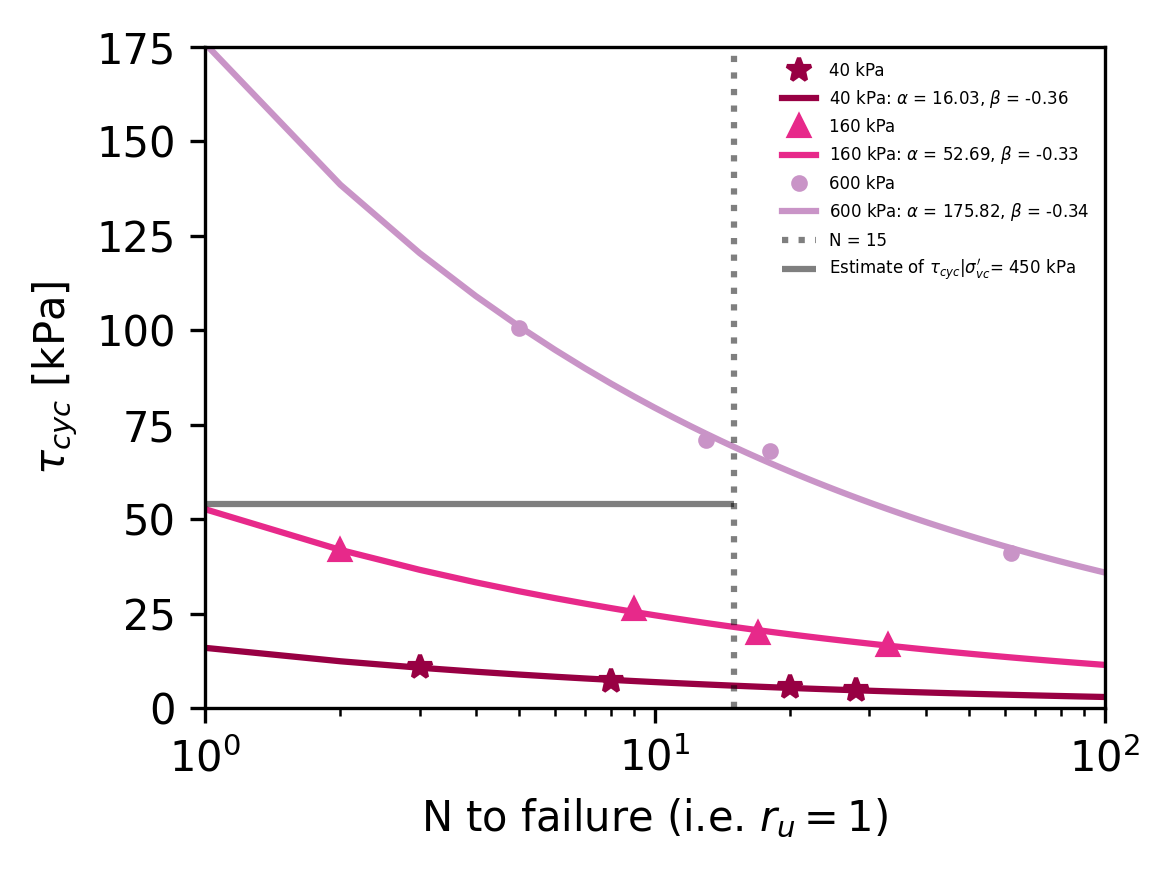

In [4]:
# create graph of tau cyc vs N to failure
N_line = np.linspace(1, 100, 100)

fig, ax = plt.subplots(figsize=(4,3), dpi=300, tight_layout=True)

ax.semilogx(N_failure_40, tau_cyc_40, label='40 kPa', marker='*', linestyle="None", color=colors[0])
ax.semilogx(N_line, power_series(N_line, *csr_fit_40[0]), color=colors[0], label = '40 kPa: $\\alpha$ = {:.2f}, $\\beta$ = {:.2f}'.format(csr_fit_40[0][0], csr_fit_40[0][1]))

ax.semilogx(N_failure_160, tau_cyc_160, label='160 kPa', marker='^', markersize=5, linestyle="None", color= colors[1])
ax.semilogx(N_line, power_series(N_line, *csr_fit_160[0]), color=colors[1], label = '160 kPa: $\\alpha$ = {:.2f}, $\\beta$ = {:.2f}'.format(csr_fit_160[0][0], csr_fit_160[0][1]))

ax.semilogx(N_failure_600, tau_cyc_600, label='600 kPa', marker='.', linestyle="None", color=colors[2])
ax.semilogx(N_line, power_series(N_line, *csr_fit_600[0]), color=colors[2], label = '600 kPa: $\\alpha$ = {:.2f}, $\\beta$ = {:.2f}'.format(csr_fit_600[0][0], csr_fit_600[0][1]))

ax.vlines(15, 0, 175, color='black', linestyle=':', alpha=0.5, linewidth=1.5, label='N = 15')
ax.hlines(54, 1, 15, color='black', linestyle='-', alpha=0.5, linewidth=1.5, label="Estimate of $\\tau_{cyc} | \\sigma_{vc}'$= 450 kPa")
# ax.hlines(15, 1, 15, color='black', linestyle='--', alpha=0.5, linewidth=1.5, label="Estimate of $\\tau_{cyc} | \\sigma_{vc}'$= 100 kPa")


ax.set_xlim(1, 100)
ax.set_ylim(0, 175)

ax.set_xlabel('N to failure (i.e. $r_u = 1$)')
ax.set_ylabel('$\\tau_{cyc}$ [kPa]')
ax.legend(frameon=False, loc='best', fontsize=4, ncol = 1)

plt.show()

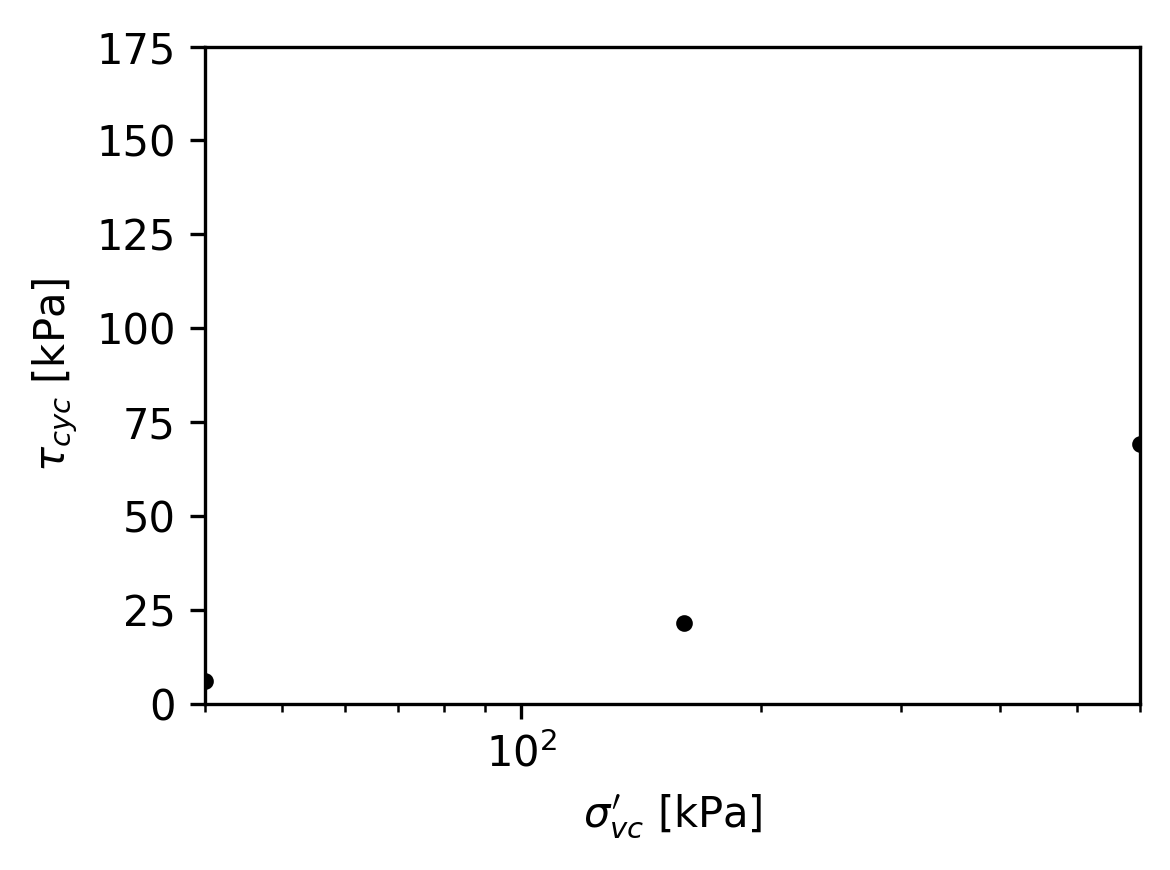

In [7]:
tau_cyc_fail = np.array([power_series(15, *csr_fit_40[0]), power_series(15, *csr_fit_160[0]), power_series(15, *csr_fit_600[0])]) # tau cyclic values in kPa for N to failure of 15
sigma_vc_fail = np.array([40, 160, 600]) # vConsolStress values in kPa for N to failure of 15

fig, ax = plt.subplots(figsize=(4,3), dpi=300, tight_layout=True)

ax.semilogx(sigma_vc_fail, tau_cyc_fail, marker='.', linestyle="None", color='black')

ax.set_xlim(40, 600)
ax.set_ylim(0, 175)

ax.set_xlabel("$\\sigma_{vc}'$ [kPa]")
ax.set_ylabel('$\\tau_{cyc}$ [kPa]')

plt.show()